In [1]:
from pyforest import *

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report

from sklearn.svm import SVC

from catboost import CatBoostClassifier

from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression

In [55]:
df= pd.read_csv(r"train_ctrUa4K.csv")

df.head()

<IPython.core.display.Javascript object>

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [56]:
df.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [57]:
df= df.fillna(method="ffill")
df= df.fillna(method="bfill")

In [58]:
df.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [52]:
from sklearn.preprocessing import LabelEncoder

In [59]:
target_values = {'Y': 0 , 'N' : 1}

target = df['Loan_Status']
df.drop('Loan_Status', axis=1, inplace=True)

target = target.map(target_values)

In [61]:
df["Loan_Status"]= target

In [63]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,1
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,0


In [67]:
df= df.drop("Loan_ID", axis=1)

In [68]:
lr= LabelEncoder()

In [69]:
df["Gender"]= lr.fit_transform(df.Gender.values)
df["Married"]= lr.fit_transform(df.Married.values)
df["Dependents"]= lr.fit_transform(df.Dependents.values)
df["Education"]= lr.fit_transform(df.Education.values)
df["Self_Employed"]= lr.fit_transform(df.Self_Employed.values)
df["Property_Area"]= lr.fit_transform(df.Property_Area.values)

### feature selection

In [70]:
from sklearn.ensemble import ExtraTreesClassifier

In [71]:
X= df.drop("Loan_Status", axis=1)
y= df.Loan_Status

In [72]:
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [73]:
print(model.feature_importances_)

[0.023333   0.01998548 0.05850788 0.02094379 0.02442329 0.17541189
 0.11729086 0.18924037 0.05067116 0.26895255 0.05123972]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

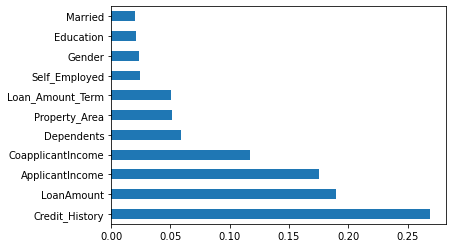

In [74]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()

In [75]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2


In [76]:
# credit history, loan amount, applicant income, coapplicant income

### here we see top 5 features from the bottom of the bar graph

In [77]:
X_new= X.drop(["Gender","Married","Dependents","Education","Self_Employed","Property_Area"], axis=1)

In [79]:
X_new.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,128.0,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


In [80]:
from sklearn.preprocessing import StandardScaler

In [81]:
scaler= StandardScaler()

In [82]:
X_new_1= scaler.fit_transform(X_new)

X_new_1

array([[ 0.07299082, -0.55448733, -0.22146577,  0.28003663,  0.44371285],
       [-0.13441195, -0.03873155, -0.22146577,  0.28003663,  0.44371285],
       [-0.39374734, -0.55448733, -0.93106589,  0.28003663,  0.44371285],
       ...,
       [ 0.43717437, -0.47240418,  1.20917963,  0.28003663,  0.44371285],
       [ 0.35706382, -0.55448733,  0.45379886,  0.28003663,  0.44371285],
       [-0.13441195, -0.55448733, -0.16423996,  0.28003663, -2.25370981]])

In [84]:
y_new= np.asarray(y)

<IPython.core.display.Javascript object>

In [85]:
X_train, X_test, y_train, y_test= train_test_split(X_new_1,y_new, test_size=0.3, random_state=42)

In [86]:
model= LogisticRegression()

In [87]:
model.fit(X_train,y_train)

LogisticRegression()

In [89]:
y_pred= model.predict(X_test)

In [90]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [91]:
model.score(X_test,y_test)

0.7945945945945946